In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

In [6]:
test2_file = 'test2.csv'
train2_file = 'train2.csv'
val2_file = 'val2.csv'

In [7]:
test2 = pd.read_csv(test2_file)
train2 = pd.read_csv(train2_file)
val2 = pd.read_csv(val2_file)

In [8]:
def graph(file):
    return sb.countplot(x='Label',data = file, palette = 'hls')

In [9]:
test2

,S No.,ID,Label,Statement,Subject,Speaker,Speaker's Job,State Info,Party,Barely true Accounts,False Accounts,Half true Accounts,Mostly true Accounts,Pants on Fire Accounts,Context,Justification
0,0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w..."
1,1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...
2,2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he..."
3,3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ..."
4,4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...
5,5,5962.json,TRUE,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website,Rhode Islands former top cop is setting his ba...
6,6,7070.json,TRUE,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0,0,0,0,0,in a post on Facebook.,Residents in those suburbs do not get a vote b...
7,7,1046.json,barely-true,"Says Vice President Joe Biden ""admits that the...","economy,stimulus",john-boehner,Speaker of the House of Representatives,Ohio,republican,13,22,11,4,2,a press release.,Boehner may be technically correct that Biden ...
8,8,12849.json,TRUE,Donald Trump is against marriage equality. He ...,"gays-and-lesbians,marriage",sean-patrick-maloney,Congressman for NY-18,New York,democrat,0,0,0,0,0,a speech at the Democratic National Convention,Speaking at the Democratic National Convention...
9,9,13270.json,barely-true,We know that more than half of Hillary Clinton...,foreign-policy,mike-pence,Governor,Indiana,republican,8,10,12,5,0,"comments on ""Meet the Press""","Pence said, ""We know that more than half of Hi..."


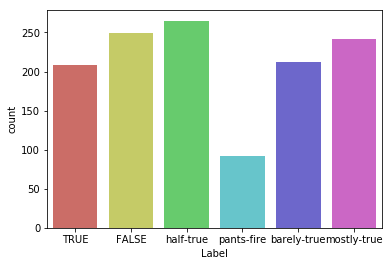

In [10]:
graph(test2)

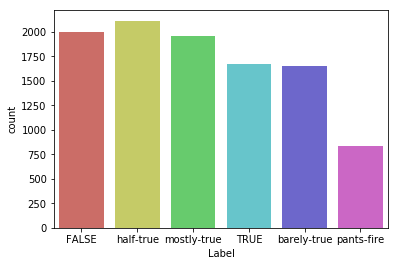

In [11]:
graph(train2)

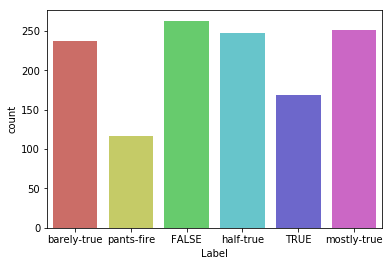

In [12]:
graph(val2)

In [13]:
def stemming_token(stemmer,tokens):
    stemmed = []
    for t in tokens:
        stemmed.append(stemmer.stem(t))
    return stemmed

In [14]:
eng = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

In [15]:
def processing(data,exclude_stopword=True,stem = True):
    for i in data:
        tokens.append(i.lower())
    tokens_stemmed = tokens
    tokens_stemmed = stemming_token(eng,tokens)
    tokens_stemmed = [j for j in tokens_stemmed if i not in stopwords]

In [16]:
def unigram(words):
    assert type(words) == list
    return words

In [17]:
def bigram(words):
    assert type(words) == list
    skip = 0
    s = " "
    length = len(words)
    if(len >1):
        lst = []
        for i in range(length-1):
            for j in range(1,skip+2):
                if(i+j < length):
                    lst.append(s.join([words[i],words[i+j]]))
    else:
        lst = unigram(words)
    return lst

In [18]:
def tokenizing(text):
    return text.split()

In [19]:
def port_token(text):
    return [porter.stem(word) for word in text.split()]

In [20]:
for i in range(len(test2)):
    if(test2.iloc[i,2] == "TRUE" or test2.iloc[i,2] == 'half-true' or test2.iloc[i,2] == 'mostly-true'):
        test2.iloc[i,2] = 'TRUE'
    else:
        test2.iloc[i,2] = 'FALSE'

In [21]:
for i in range(len(train2)):
    if(train2.iloc[i,2] == "TRUE" or train2.iloc[i,2] == 'half-true' or train2.iloc[i,2] == 'mostly-true'):
        train2.iloc[i,2] = 'TRUE'
    else:
        train2.iloc[i,2] = 'FALSE'

In [22]:
for i in range(len(val2)):
    if(val2.iloc[i,2] == "TRUE" or val2.iloc[i,2] == 'half-true' or val2.iloc[i,2] == 'mostly-true'):
        val2.iloc[i,2] = 'TRUE'
    else:
        val2.iloc[i,2] = 'FALSE'